# Qué es aprendizaje no supervisado? 

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris.data, iris.target], columns = iris.feature_names + ['Label'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Aprendizaje supervisado es aquel que se preocupa de mediante técnicas/algoritmos tratar problemas de data que está clasificada. 

In [4]:
df['Clase'] = df['Label'].apply(lambda x: iris.target_names[int(x)])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Clase
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [5]:
df.Clase.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Clase, dtype: int64

## Entonces qué es NO supervisado?

In [6]:
df_no_label = df.drop(columns = ['Label', 'Clase'])
df_no_label

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Qué es aprendizaje no supervisado? 
Es aquel que se encarga de encontrar asociaciones, agrupaciones, grupos, clusters en datos. Por lo tanto, los algoritmos tiene como desafío encontrar esos grupos.



## K-Means

- Algoritmo de aprendizaje no supervisado.
- El objetivo de kmeans es crear grupos de datos segun un K propuesto.
(Si no sé cuantos grupos hay, puedo determinar el valor de K ? Sí)
- Calcula **centros** de agrupaciones, estos centros son calculados mediante iteraciones, por lo tanto, tiene algunos problemas ante algunos casos especiales.
- Al crear un número k de grupos con ciertas características podemos ser capaces de clasificar nuevos puntos.
 

In [13]:
df_no_label

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


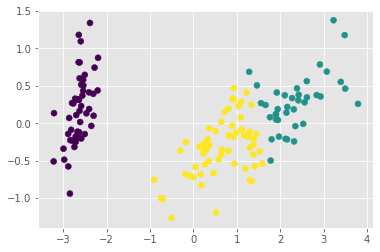

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(2)
datos = pca.fit_transform(df_no_label)

k_medias = KMeans(n_clusters=3).fit(datos)
x = [x[0] for x in datos]
y = [x[1] for x in datos]

import matplotlib.pyplot as plt

plt.scatter(x, y , c=k_medias.labels_)


In [24]:
import collections

collections.Counter(k_medias.labels_)


Counter({0: 50, 1: 39, 2: 61})